In [1]:
import sys
sys.path.append('..')
import pprint
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import matplotlib as mpl
from itertools import tee
import matplotlib.pyplot as plt
from collections import OrderedDict
from matplotlib.colors import Normalize
from matplotlib.ticker import FormatStrFormatter
from evidence_theory import core, experiment
from scipy.spatial.distance import squareform

In [2]:

N = 10000  # number of samples
f_name = f"results4.csv"
entropy_measures = [
    core.hohle,
    core.smets,
    core.yager,
    core.nguyen,
    core.dubois_prade,
    core.lamata_moral,
    core.klir_and_ramer,
    core.klir_and_parviz,
    core.pal_et_al,
    core.deng,
    core.jirousek_and_shenoy,
    core.qin_et_al,
    core.yan_and_deng,
    core.li_et_al,
    core.harmanec_and_klir,
    core.li_and_pan,
    core.pan_and_deng,
    core.deng_and_wang,
    core.jousselme_et_al,
    core.yang_and_han,
    core.fractal_based_entropy,
    core.cui_et_al,
    core.george_and_pal,
    core.wang_and_song,
]
if f_name in os.listdir():
    r = pd.read_csv(f_name, index_col=0)
else:
    r = experiment.experiment(N, m, entropy_measures)
    r.to_csv(f_name)

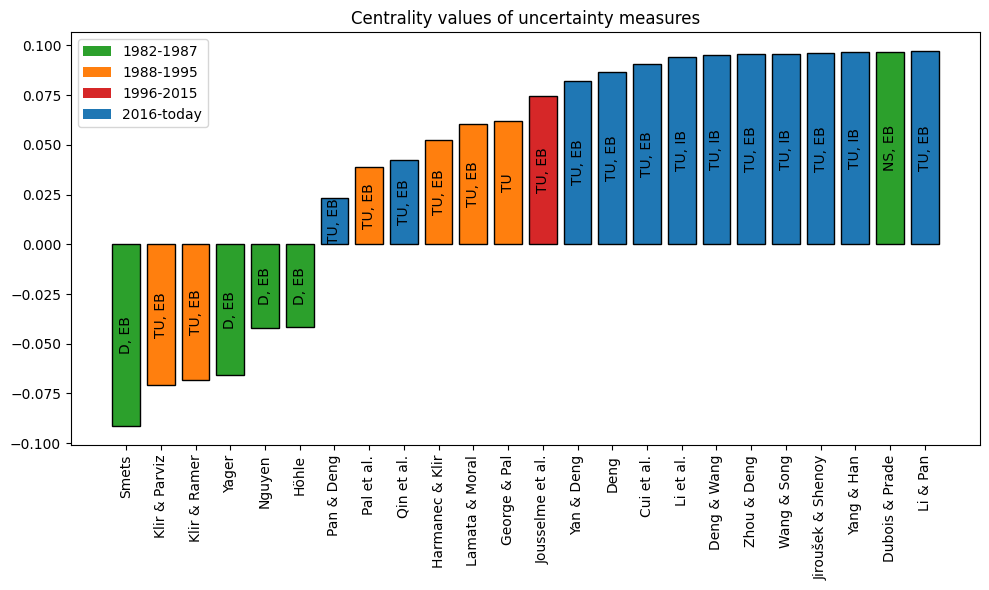

In [3]:

from matplotlib.patches import Patch
col = {
    1: "tab:green",
    2: "tab:orange",
    3: "tab:red",
    4: "tab:blue",
    5: "w"
}
hatches = {
    1: "//",
    2: "+",
    3: "x",
    4: "o"
}

data = [[i.name, i.period, i.classification] for i in entropy_measures]
r = r.filter(items=[i.__name__ for i in entropy_measures])
sp = r.corr(method="spearman")
g = nx.from_numpy_matrix(sp.to_numpy(), create_using=nx.MultiGraph, parallel_edges=False)
c = nx.eigenvector_centrality_numpy(g, weight="weight")
# assign names to measures
[data[k].append(v) for k, v in c.items()]
data.sort(key=lambda x: x[-1])
# print latex representation
text = ""
for i in data:
    if "&" in i[0]:
        name = i[0].replace("&", "\&")
    else:
        name = i[0]

    text += name + "&" + str(i[1])[:3] + "\\\\\n"

# save values
with open("centrality.txt", "w") as f:
    f.write(text)

# print histogram
fig, ax = plt.subplots(figsize=(10, 6))
tot = sum([i[-1] for i in data])
bars = ax.bar(
    x=range(len(data)),
    height=[i[-1] / tot for i in data],
    tick_label=[i[0] for i in data],
    edgecolor='k',
    color=[col[i[1]] for i in data],
    # hatch=[hatches[i] for i in codes],
)
ax.set_title("Centrality values of uncertainty measures")
ax.legend(
    handles=[Patch(facecolor=col[i]) for i in range(1, 5)],
    labels=["1982-1987", "1988-1995", "1996-2015", "2016-today"]
)

ax.bar_label(
    bars,
    [i[2] for i in data],
    rotation=90,
    # padding=5,
    label_type='center'
)
plt.xticks(rotation=90)
plt.tight_layout()

plt.savefig("centrality.pdf", dpi=200)

In [4]:
data

[['Smets', 1, 'D, EB', -0.24317543900835834],
 ['Klir & Parviz', 2, 'TU, EB', -0.18838462246046828],
 ['Klir & Ramer', 2, 'TU, EB', -0.18097557813076895],
 ['Yager', 1, 'D, EB', -0.1746102485377539],
 ['Nguyen', 1, 'D, EB', -0.11188814504714831],
 ['Höhle', 1, 'D, EB', -0.11041288413441284],
 ['Pan & Deng', 4, 'TU, EB', 0.062229927153194906],
 ['Pal et al.', 2, 'TU, EB', 0.10283153082016186],
 ['Qin et al.', 4, 'TU, EB', 0.11247798720694294],
 ['Harmanec & Klir', 2, 'TU, EB', 0.13890767829729686],
 ['Lamata & Moral', 2, 'TU, EB', 0.16028438271038514],
 ['George & Pal', 2, 'TU', 0.1652569396488808],
 ['Jousselme et al.', 3, 'TU, EB', 0.19775049556123278],
 ['Yan & Deng', 4, 'TU, EB', 0.2187781947469881],
 ['Deng', 4, 'TU, EB', 0.23023803503451307],
 ['Cui et al.', 4, 'TU, EB', 0.2411632396561267],
 ['Li et al.', 4, 'TU, IB', 0.24998306936193881],
 ['Deng & Wang', 4, 'TU, IB', 0.25317100266202525],
 ['Zhou & Deng', 4, 'TU, EB', 0.25438809582658495],
 ['Wang & Song', 4, 'TU, IB', 0.254674